# Normal distribution and Z score exercise

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bhp = pd.read_csv("bhp.csv")
bhp.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [11]:
bhp.price_per_sqft

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13200, dtype: int64

In [23]:
lower_limit, upper_limit = bhp.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit #defining both upper and lower limit 

(1366.184, 50959.36200000098)

In [25]:
outliers = bhp[(bhp.price_per_sqft > upper_limit) | (bhp.price_per_sqft < lower_limit)]
outliers #showing the outliers 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [28]:
bhp2 = bhp[(bhp.price_per_sqft < upper_limit) & (bhp.price_per_sqft > lower_limit)]
bhp2.shape #having a look at dataframe with removed outliers

(13172, 7)

In [29]:
bhp.shape #having a look at the dataframe with outliers

(13200, 7)

In [33]:
bhp.shape[0] - bhp2.shape[0]

28

In [34]:
max_limit = bhp2.price_per_sqft.mean() + 4*bhp2.price_per_sqft.std()
min_limit = bhp2.price_per_sqft.mean() - 4*bhp2.price_per_sqft.std()
max_limit, min_limit #declaring min and max limits for std equations

(23227.73653589432, -9900.429065502582)

In [36]:
bhp3 = bhp2[(bhp2.price_per_sqft > min_limit) & (bhp2.price_per_sqft < max_limit)]
bhp3.shape 

(13047, 7)

In [37]:
bhp2.shape[0] - bhp3.shape[0] #comparing the number of outliers removed from previous dataset

125

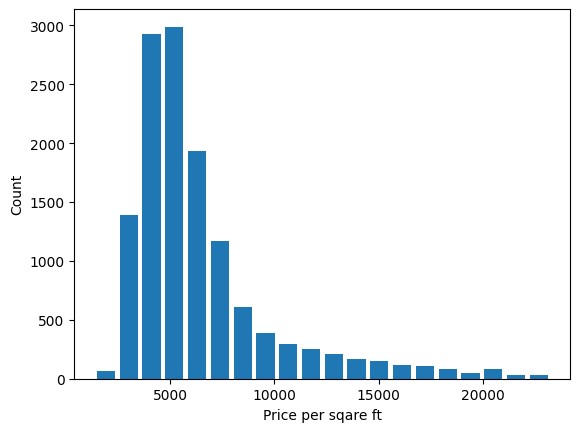

In [39]:
plt.hist(bhp3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqare ft')
plt.ylabel('Count')
plt.show()

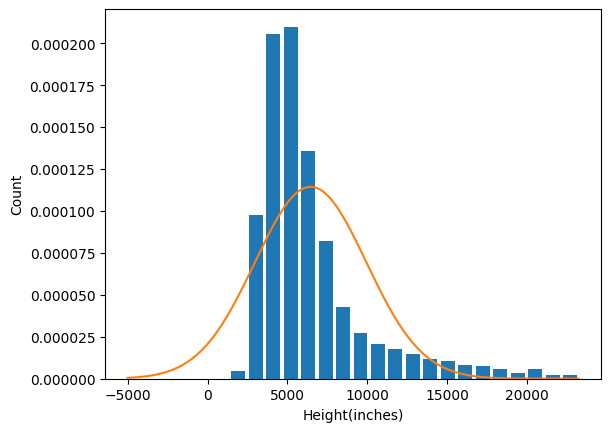

In [41]:
from scipy.stats import norm
plt.hist(bhp3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng = np.arange(-5000, bhp3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,bhp3.price_per_sqft.mean(),bhp3.price_per_sqft.std()))

#rng defines to range of the histogram from -5000 to max value of price_per_sqft, every 100
#krzywa gęstości prawdopodobieństwa

In [44]:
bhp2['zscore'] =(bhp2.price_per_sqft-bhp2.price_per_sqft.mean())/bhp2.price_per_sqft.std()
bhp2.sample(10)

C:\Users\OlkaSz\AppData\Local\Temp\ipykernel_20556\1303214037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhp2['zscore'] =(bhp2.price_per_sqft-bhp2.price_per_sqft.mean())/bhp2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
30,Yelahanka,4 BHK,2475.0,4.0,186.0,4,7515,0.205589
5181,Anjanapura,2 BHK,950.0,2.0,40.0,2,4210,-0.592524
452,AECS Layout,3 BHK,1620.0,3.0,98.0,3,6049,-0.148430
465,Vidyaranyapura,2 Bedroom,1440.0,2.0,95.0,2,6597,-0.016096
2338,Kadugodi,4 Bedroom,1920.0,4.0,200.0,4,10416,0.906140
12590,Haralur Road,3 BHK,1464.0,3.0,56.0,3,3825,-0.685496
10946,Sarjapur Road,3 BHK,1510.0,2.0,110.0,3,7284,0.149805
5573,Hebbal,2 BHK,1138.0,2.0,110.0,2,9666,0.725026
11777,Thanisandra,2 BHK,965.0,2.0,54.0,2,5595,-0.258065
8419,Whitefield,3 BHK,3596.0,3.0,200.0,3,5561,-0.266276


In [45]:
outliers_z = bhp2[(bhp2.zscore <-4) | (bhp2.zscore >4)]
outliers_z.shape

(125, 8)

In [46]:
bhp4 = bhp2[(bhp2.zscore>-4) & (bhp2.zscore<4)]
bhp4.shape

(13047, 8)

In [47]:
bhp2.shape[0] - bhp4.shape[0]

125